In [1]:
import os
import sys
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as gg
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
import seaborn

In [2]:

path = '/Users/habbasi/Desktop/050919_Nathianel_Gray/collated/'
file1 = os.path.join(path, 'C-7210-01-CMP-008-gray_collapsed_sampled.csv')

# # Platemap 
# path = '/Users/habbasi/Desktop/2018_11_20_Batch1'
# file2 = os.path.join(path, 'Nathaniel_Gray_platemap.csv')


data = pd.read_csv(file1)
# data2 = pd.read_csv(file2)


#Merging of dataframes (Platemap with compound information + old data)
#data = data2.merge(data1, on = ['Metadata_broad_sample'])

# data = pd.merge(data1, data2, on=['Metadata_broad_sample'], how='inner')
data.head()

#data.to_csv("/Users/habbasi/Desktop/2018_11_20_Batch1/C-7210-01-CMP-008-gray_collapsed_new1.csv", index=False)
# data.head()
metacol = data.columns.str.contains('Metadata')
var = data.loc[:, ~metacol]
compound = pd.DataFrame(data[['Metadata_compound_name', 'Metadata_Annotation']])
df = compound.merge(var, left_index=True, right_index=True)
df.head()


,Metadata_compound_name,Metadata_Annotation,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_2_0,...,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_RNA_10_0
0,DMSO,control,0.292781,-0.755093,-0.370666,0.391496,0.400719,0.416554,0.193765,1.029827,...,2.955818,2.418601,0.452312,-0.042997,0.029103,1.863015,0.260474,-0.406888,-1.472627,1.553440
1,DMSO,control,1.655868,0.144509,0.426249,0.015796,0.116409,0.387667,-0.559946,0.948529,...,2.998245,2.430174,1.015623,0.903345,0.223630,1.921850,1.073058,0.268220,-0.737522,1.937567
2,DMSO,control,1.332148,1.393562,1.366605,-1.397387,-2.772342,-1.722355,-1.805149,0.389903,...,2.435686,1.495686,-0.708609,-0.643061,-1.213359,0.899227,-0.567146,-1.956910,-1.954895,1.614494
3,DMSO,control,0.478297,1.486423,2.101107,-1.652892,0.686563,-0.366623,-1.713438,-1.078548,...,2.689531,1.977020,1.115532,0.600481,0.854900,1.900142,0.694659,0.460108,-0.471796,1.502498
4,DMSO,control,-0.296018,2.150570,1.965989,-1.333537,-0.010357,-1.379511,-1.659553,-2.673795,...,2.422657,1.660775,-0.874452,-0.954541,-1.110253,1.665870,-1.000594,0.804679,-0.921515,1.714833


In [3]:
# compounds names are converted into index column using groupby function and reset it back
# df_merge = df_merge.rename_axis('Metadata_compound_name').reset_index()
# df_merge.head()

In [4]:
# Aggregating mean profiles per Metadata_Broad_sample
df_merge = df.groupby('Metadata_compound_name').mean()
df_merge.head()

sample_var = df_merge.columns.str.contains('Metadata')
var_selected = df_merge.loc[:, ~sample_var]
var_selected.head()

,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,...,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_RNA_10_0
Metadata_compound_name,,,,,,,,,,,,,,,,,,,,,
AX15836,-1.008785,-0.365409,-0.387931,0.231240,0.576126,0.078790,0.646643,-0.100572,-0.314221,0.514928,...,-0.217805,-0.293161,0.048838,-0.189722,0.102282,-0.262954,-0.080530,0.620925,0.220967,-0.297324
BJP-06-005-3,-0.507998,-0.181331,-0.101043,0.259665,0.510671,0.291265,0.246489,-0.117133,-0.019535,0.240187,...,-0.208868,-0.529212,-0.078081,-0.092004,-0.060866,-0.529895,-0.047848,-0.133005,-0.011738,-0.160868
BJP-06-115-3,-0.606999,-0.390341,-0.369357,0.246245,0.198602,0.051401,0.404044,0.132953,-0.147810,0.059875,...,-0.571319,-0.809248,-0.411235,-0.383531,-0.406818,-0.809932,-0.353374,-0.146045,-0.173777,-0.772213
BSJ-03-136,13.527845,9.403462,6.686591,-6.304271,-3.984446,-1.225026,-7.947279,-7.030619,5.527065,-4.310428,...,0.227065,-0.180743,0.440305,1.053829,-0.493989,-1.443753,2.481807,2.101853,1.047183,-2.062882
BSJ-04-030,7.208708,3.592460,2.412935,-2.684777,-3.838264,-0.478828,-3.865464,-1.268788,1.330920,-4.232389,...,-0.682440,-1.283809,-0.465358,0.279923,-1.163935,-2.274338,1.066978,1.716695,0.106023,-1.548798


# Data Parsing

In [5]:

filter_A549 = (data.Metadata_Plate == 'BR00100032') | (data.Metadata_cell_line == 'A549')
filter_U2oS  = (data.Metadata_Plate == 'BR00100037') | (data.Metadata_cell_line == 'U2oS')

data_A549 = data[filter_A549]
data_U2oS = data[filter_U2oS]

data_U2oS.head()

metacol_A549 = data_A549.columns.str.contains('Metadata')
metacol_U2oS = data_U2oS.columns.str.contains('Metadata')

var_A549 = data_A549.loc[:, ~metacol_A549]
compound_A549 = pd.DataFrame(data_A549[['Metadata_compound_name', 'Metadata_Annotation']])

var_U2oS = data_U2oS.loc[:, ~metacol_U2oS]
compound_U2oS = pd.DataFrame(data_U2oS[['Metadata_compound_name', 'Metadata_Annotation']])

df_A549 = compound_A549.merge(var_A549, left_index=True, right_index=True)
df_A549_merge = df_A549.groupby('Metadata_compound_name').mean()

df_U2oS = compound_U2oS.merge(var_U2oS, left_index=True, right_index=True)
df_U2oS_merge = df_U2oS.groupby('Metadata_compound_name').mean()

df_U2oS_merge.head()


,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,...,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_RNA_10_0
Metadata_compound_name,,,,,,,,,,,,,,,,,,,,,
AX15836,-0.982015,-0.807114,-0.822790,0.593423,0.271807,0.032335,0.896543,0.747137,-0.611992,0.329365,...,-0.238747,-0.214061,-0.357414,-0.388962,-0.409673,-0.552010,-0.321137,0.398047,-0.095006,-0.358334
BJP-06-005-3,-0.523323,-0.111636,0.107153,0.096033,0.163558,0.046142,-0.008015,0.070520,0.102651,-0.099840,...,0.311102,-0.553317,-0.507836,-0.445675,-0.580337,-0.486287,-0.408469,-0.383427,-0.158903,0.369685
BJP-06-115-3,-0.569246,-0.470714,-0.424010,0.255255,-0.121214,-0.215764,0.340961,0.507676,-0.207154,-0.447968,...,-0.536180,-1.009594,-0.942084,-0.863292,-1.017072,-1.063551,-0.837163,-0.697257,-0.891435,-0.942620
BSJ-03-136,5.503155,12.795247,6.679804,-10.804883,-2.249695,-4.796990,-9.699492,-10.978017,6.154423,-2.297453,...,-0.829224,-0.723933,0.414275,0.298142,-0.110042,-3.579835,1.073398,-1.730677,1.107140,-4.100337
BSJ-04-030,4.176260,8.526568,5.508244,-6.885207,-1.146753,-2.255443,-7.089560,-7.347013,4.834939,-2.331274,...,-0.685175,-1.048799,-0.015357,-0.024189,-0.514246,-2.644156,0.650172,0.648723,1.417024,-2.377584


# For combining merging two cell lines

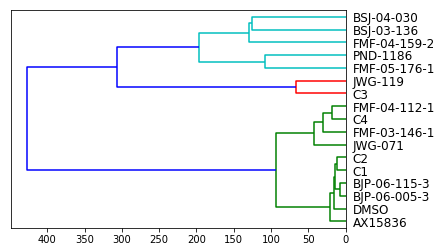

In [7]:


Z_A549 =sch.linkage(df_A549_merge, 'ward')
fig = dendrogram(Z_A549, leaf_rotation=0, orientation="left", labels=df_A549_merge.index)
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram_A549.pdf', bbox_inches='tight') 


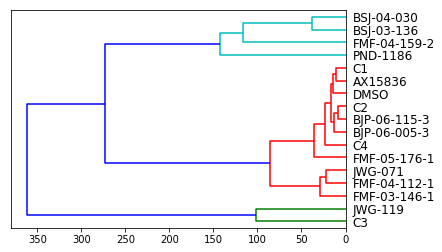

In [8]:
Z_U2oS =sch.linkage(df_U2oS_merge, 'ward')
fig = dendrogram(Z_U2oS, leaf_rotation=0, orientation="left", labels=df_U2oS_merge.index)
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram_U2oS.pdf', bbox_inches='tight') 

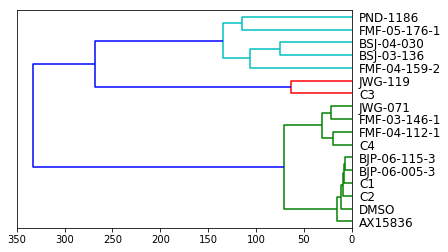

In [9]:
Z=sch.linkage(df_merge, 'ward')
fig = dendrogram(Z, leaf_rotation=0, orientation="left", labels=df_merge.index)
# my_palette = plt.cm.get_cmap("Accent", 3)
# test['Metadata_broad_sample'] = pd.Categorical(test['Metadata_broad_sample'])
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram.pdf', bbox_inches='tight') 

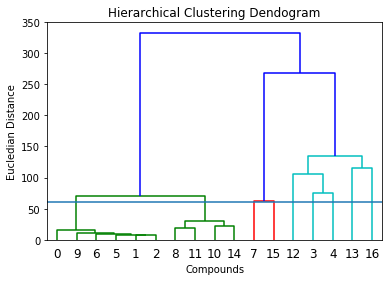

In [10]:
fig = sch.dendrogram(sch.linkage(df_merge, method ='ward'))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Compounds')
plt.ylabel('Eucledian Distance')
plt.axhline(y=60)
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram_top.pdf', bbox_inches='tight') 